# Visuals

In [1]:
import pandas as pd
import numpy as np
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [224]:
db = pd.read_csv('clean_data_complete.csv')

In [225]:
db['Plantilla']

0          licitacion
1          licitacion
2        adjudicacion
3          invitacion
4          invitacion
             ...     
96117    adjudicacion
96118    adjudicacion
96119    adjudicacion
96120    adjudicacion
96121    adjudicacion
Name: Plantilla, Length: 96122, dtype: object

In [4]:
db.dtypes

Caracter del procedimiento                  object
Forma del procedimiento                     object
Operador                                    object
Correo electronico                          object
Entidad federativa                          object
Tipo de contratacion                        object
Articulo                                    object
Plantilla                                   object
Forma_Procedimiento_Presencial               int64
Forma_Procedimiento_Electronica              int64
Forma_Procedimiento_Mixta                    int64
Entidad_federativa_Norte                     int64
Entidad_federativa_Centro                    int64
Entidad_federativa_Golfo                     int64
Entidad_federativa_PacificoSur               int64
Entidad_federativa_Sur                       int64
Entidad_federativa_PacificoNorte             int64
Caracter del procedimiento_Nacional          int64
Caracter del procedimiento_Internacional     int64
Articulo de excepcion_41       

## Pattern : 

Target : Forma del Procedimiento == Presencial 


{(Articulo != '42')}

In [5]:
db['Forma_Procedimiento_Presencial'] = db['Forma_Procedimiento_Presencial'].astype(str)

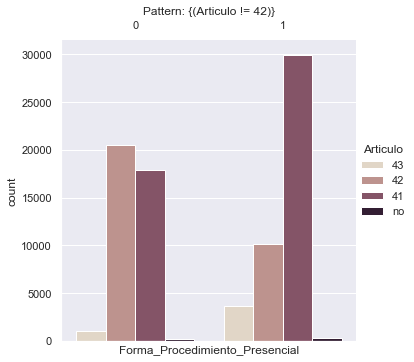

In [241]:
#Plotting 1 item
sns.set(rc={'figure.figsize':(20,11)})
chart = sns.catplot(
    data=db,
    x='Forma_Procedimiento_Presencial',
    kind = 'count',
    palette="ch:.25",
    hue = 'Articulo'
    )
plt.title('Pattern: {(Articulo != 42)}')
plt.show()

{(Caracter_del_procedimiento == 'nacional') AND (Articulo != '42')}

Text(0.5, 0.98, 'Pattern : {(Caracter_del_procedimiento == nacional) AND (Articulo != 42)}')

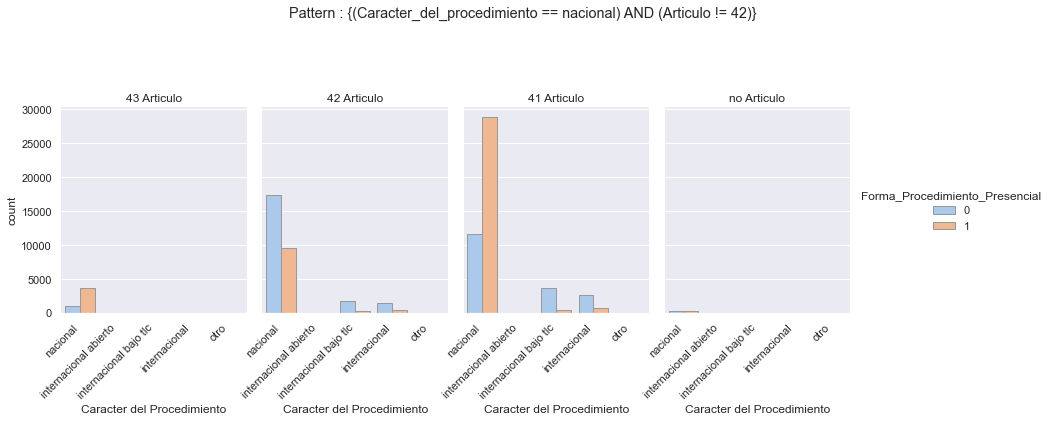

In [62]:
sns.set(rc={'figure.figsize':(20,11)})
chart = sns.catplot(
    data=db,
    x = 'Caracter del procedimiento',
    hue = 'Forma_Procedimiento_Presencial',
    col = 'Articulo',
    kind = 'count',
    ci = None, aspect = 0.6,
    palette="pastel",
    edgecolor=".6"
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')
(chart.set_axis_labels("Caracter del Procedimiento")
   .set_titles("{col_name} {col_var}")
   .despine(left=True))
plt.subplots_adjust(top=0.7)
chart.fig.suptitle('Pattern : {(Caracter_del_procedimiento == nacional) AND (Articulo != 42)}')

Text(0.5, 0.98, 'Pattern : {(Caracter_del_procedimiento == nacional) AND (Articulo != 42)}')

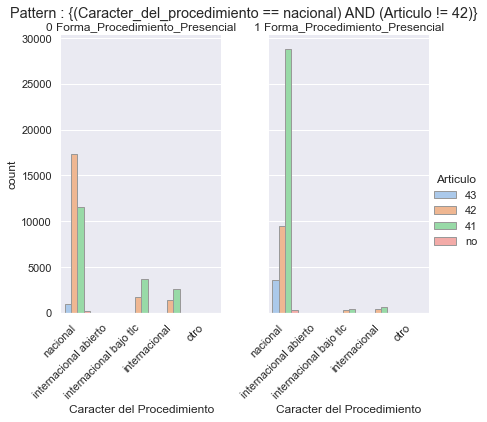

In [65]:
sns.set(rc={'figure.figsize':(30,11)})
chart = sns.catplot(
    data=db,
    x = 'Caracter del procedimiento',
    hue = 'Articulo',
    col = 'Forma_Procedimiento_Presencial',
    kind = 'count',
    ci = None, aspect = 0.6,
    palette="pastel",
    edgecolor=".6"
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')
(chart.set_axis_labels("Caracter del Procedimiento")
   .set_titles("{col_name} {col_var}")
   .despine(left=True))
plt.subplots_adjust(top=0.9)
chart.fig.suptitle('Pattern : {(Caracter_del_procedimiento == nacional) AND (Articulo != 42)}')

{(Plantilla == 'adjudicacion') AND (Articulo != '42') AND (Caracter_del_procedimiento == 'nacional')}

In [399]:
pattern_3 = db.groupby(['Forma_Procedimiento_Presencial', 'Articulo','Plantilla','Caracter del procedimiento'], as_index = False).count()
pattern_3 = pattern_3[['Forma_Procedimiento_Presencial','Articulo','Plantilla','Caracter del procedimiento']]

In [400]:
pattern_3['Forma_Procedimiento_Presencial'] = pattern_3['Forma_Procedimiento_Presencial'].map({0:'No',1:'Yes'})
pattern_3

,Forma_Procedimiento_Presencial,Articulo,Plantilla,Caracter del procedimiento
0,No,41,adjudicacion,internacional
1,No,41,adjudicacion,internacional bajo tlc
2,No,41,adjudicacion,nacional
3,No,41,invitacion,internacional
4,No,41,invitacion,internacional bajo tlc
5,No,41,invitacion,nacional
6,No,42,adjudicacion,internacional
7,No,42,adjudicacion,internacional bajo tlc
8,No,42,adjudicacion,nacional
9,No,42,invitacion,internacional


In [398]:
pattern_3['Forma_Procedimiento_Yes'] = [1 for x in pattern_3['Forma_Procedimiento_Yes'] if ]
pattern_3

[x for x in d['b'] if x >2

,Forma_Procedimiento_Presencial,Articulo,Plantilla,Caracter del procedimiento
0,0,41,adjudicacion,internacional
1,0,41,adjudicacion,internacional bajo tlc
2,0,41,adjudicacion,nacional
3,0,41,invitacion,internacional
4,0,41,invitacion,internacional bajo tlc
5,0,41,invitacion,nacional
6,0,42,adjudicacion,internacional
7,0,42,adjudicacion,internacional bajo tlc
8,0,42,adjudicacion,nacional
9,0,42,invitacion,internacional


In [358]:
fg = sns.factorplot(x='Caracter del procedimiento', y='Forma_Procedimiento_Presencial', hue='Plantilla', 
                        col='Articulo', data=pattern_3, kind='bar')
fg.set_xlabels('Caracter del procedimiento')

ValueError: Neither the `x` nor `y` variable appears to be numeric.

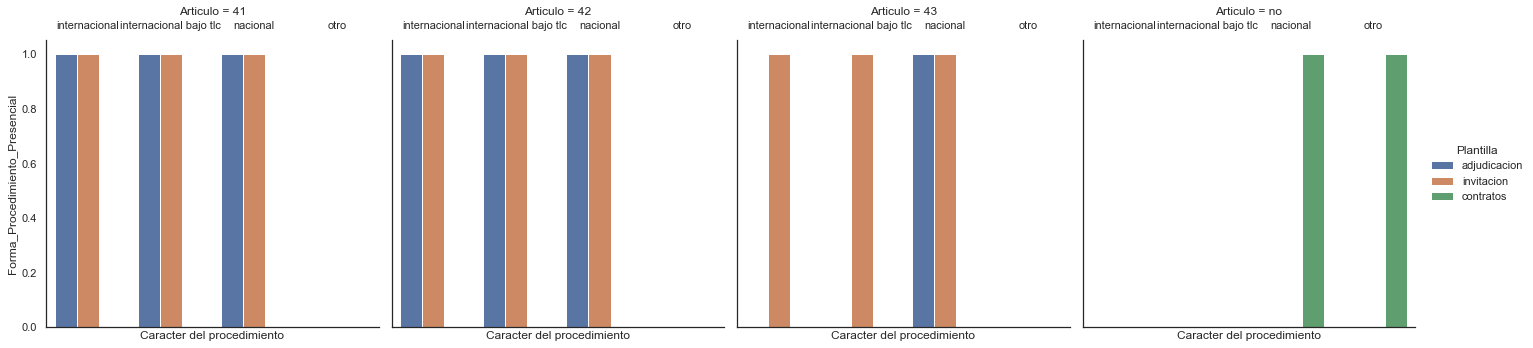

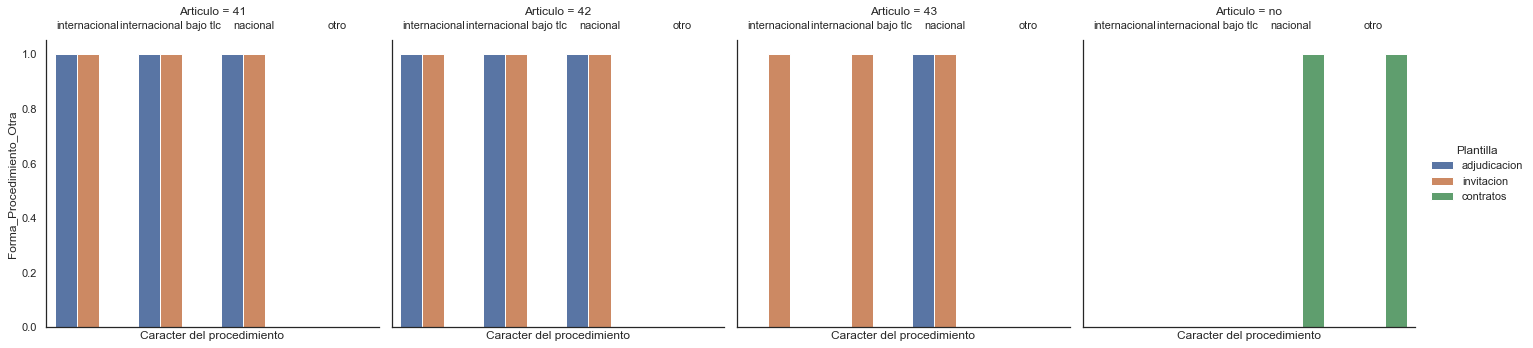

In [325]:
l=['Forma_Procedimiento_Presencial', 'Forma_Procedimiento_Otra']
index = 0
for axis in axes:   
    sns.factorplot(x='Caracter del procedimiento', y=l[index], hue='Plantilla', 
                        col='Articulo', data=pattern_3, kind='bar')
    index = index+1
plt.show()

In [310]:
pattern_4  = db.groupby(['Forma_Procedimiento_Presencial','Articulo','Plantilla','Caracter del procedimiento'], as_index = False).count()
pattern_4

,Forma_Procedimiento_Presencial,Articulo,Plantilla,Caracter del procedimiento,Forma del procedimiento,Operador,Correo electronico,Entidad federativa,Tipo de contratacion,Forma_Procedimiento_Electronica,...,Most_used_description_word_servici,Most_used_description_word_adquisicion,Most_used_description_word_material,Mes_pub,Dia_pub,Hora_pub,Min_pub,Most_used_UC_word_gyr,Most_used_UC_word_material,Most_used_UC_word_general
0,0,41,adjudicacion,internacional,2608,2608,2608,1521,2608,2608,...,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608
1,0,41,adjudicacion,internacional bajo tlc,3615,3615,3615,2317,3615,3615,...,3615,3615,3615,3615,3615,3615,3615,3615,3615,3615
2,0,41,adjudicacion,nacional,10869,10870,10870,3727,10870,10870,...,10870,10870,10870,10870,10870,10870,10870,10870,10870,10870
3,0,41,invitacion,internacional,21,21,21,4,21,21,...,21,21,21,21,21,21,21,21,21,21
4,0,41,invitacion,internacional bajo tlc,71,71,71,30,71,71,...,71,71,71,71,71,71,71,71,71,71
5,0,41,invitacion,nacional,705,705,705,350,705,705,...,705,705,705,705,705,705,705,705,705,705
6,0,42,adjudicacion,internacional,1276,1276,1276,750,1276,1276,...,1276,1276,1276,1276,1276,1276,1276,1276,1276,1276
7,0,42,adjudicacion,internacional bajo tlc,1281,1281,1281,534,1281,1281,...,1281,1281,1281,1281,1281,1281,1281,1281,1281,1281
8,0,42,adjudicacion,nacional,15327,15328,15328,4323,15328,15328,...,15328,15328,15328,15328,15328,15328,15328,15328,15328,15328
9,0,42,invitacion,internacional,112,112,112,46,112,112,...,112,112,112,112,112,112,112,112,112,112


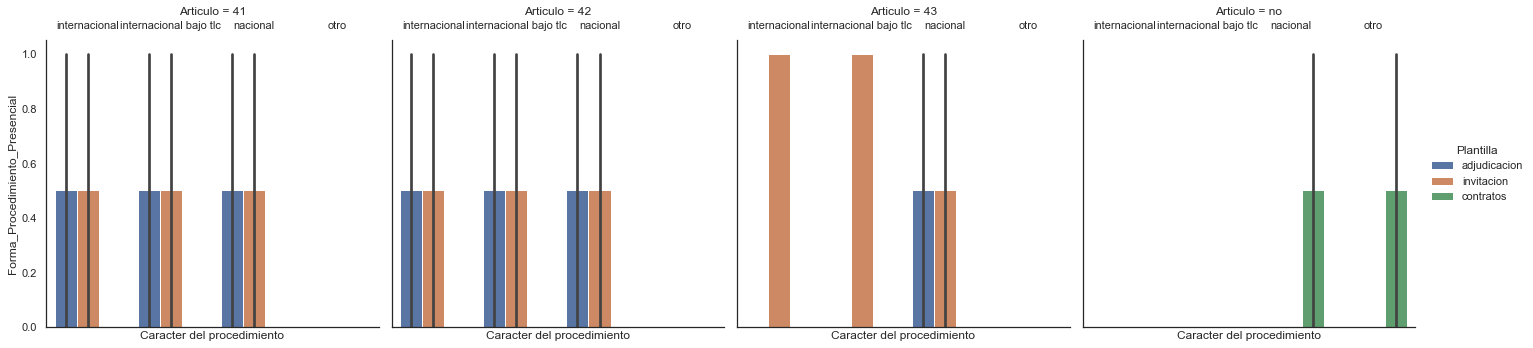

In [312]:
fg = sns.factorplot(x='Caracter del procedimiento', y='Forma_Procedimiento_Presencial', hue='Plantilla', 
                        col='Articulo', data=pattern_4, kind='bar')
fg.set_xlabels('Caracter del procedimiento')

{(Plantilla == 'adjudicacion') AND (Articulo != '42') AND (Caracter_del_procedimiento == 'nacional')}

In [ ]:
fg = sns.factorplot(x='Caracter del procedimiento', y='Forma_Procedimiento_Presencial', hue='Plantilla', 
                        col='Articulo', data=pattern_3, kind='bar')
fg.set_xlabels('Caracter del procedimiento')

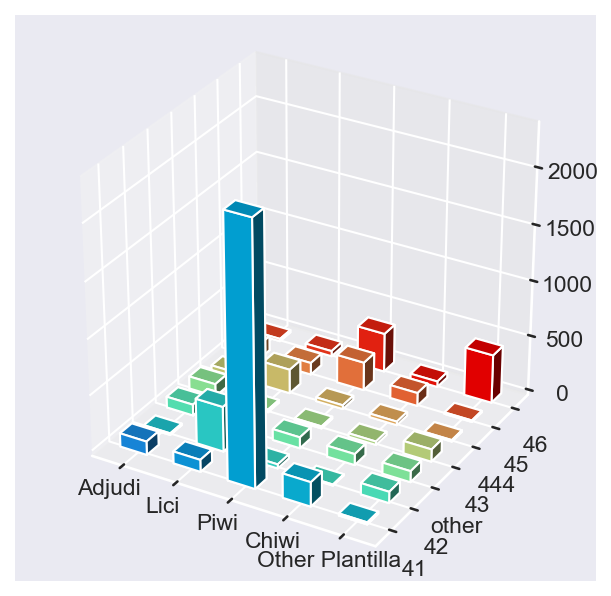

In [245]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

result=[['122', '109', '2343', '220', '19'],
 ['15', '407', '37', '10', '102'],
 ['100', '100', '100', '100', '100'],
 ['113', '25', '19', '31', '112'],
 ['43', '219', '35', '33', '14'],
 ['132', '108', '256', '119', '14'],
 ['22', '48', '352', '51', '438']]

result = np.array(result, dtype=np.int)

fig=plt.figure(figsize=(5, 5), dpi=150)
ax1=fig.add_subplot(111, projection='3d')

xlabels = np.array(['Adjudi', 'Lici', 'Piwi',
                    'Chiwi', 'Other Plantilla'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['41','42','other','43','444','45','46'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)

values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
plt.show()

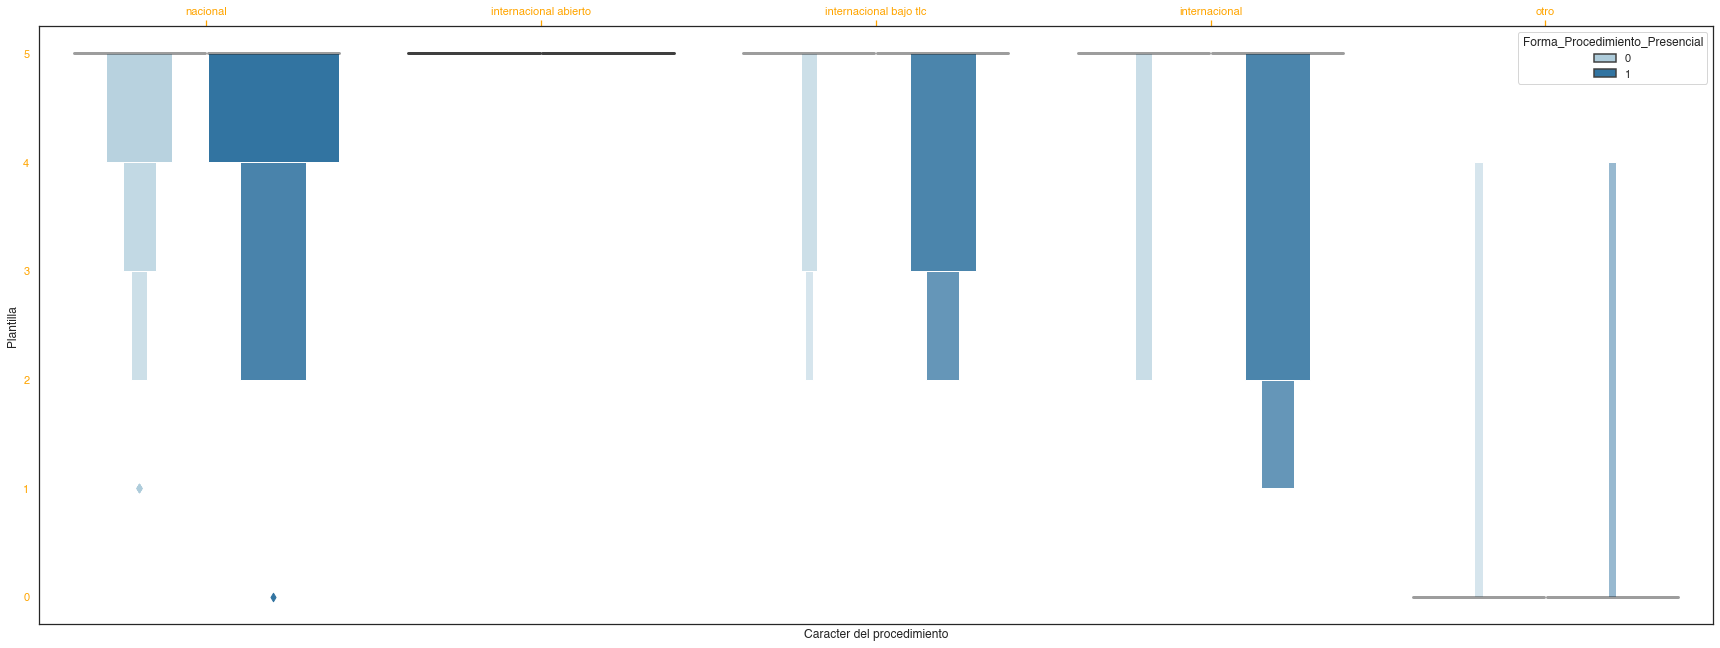

<Figure size 2160x792 with 0 Axes>

In [203]:
sns.lvplot(data=db,
         x='Caracter del procedimiento',
         y='Plantilla',
         palette='Paired',
         hue='Forma_Procedimiento_Presencial')

plt.show()
plt.clf()

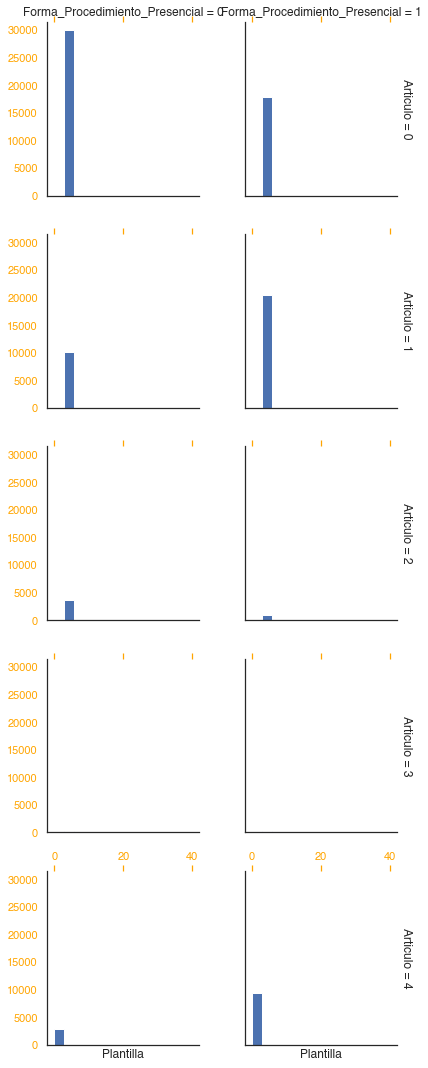

In [211]:
grid = sns.FacetGrid(db, row="Articulo", col='Forma_Procedimiento_Presencial', margin_titles=True)
grid.map(plt.hist, 'Plantilla', bins=np.linspace(0, 40, 15));

In [215]:
from statsmodels.graphics.mosaicplot import mosaic


In [227]:
db

,Caracter del procedimiento,Forma del procedimiento,Operador,Correo electronico,Entidad federativa,Tipo de contratacion,Articulo,Plantilla,Forma_Procedimiento_Presencial,Forma_Procedimiento_Electronica,...,Most_used_description_word_servici,Most_used_description_word_adquisicion,Most_used_description_word_material,Mes_pub,Dia_pub,Hora_pub,Min_pub,Most_used_UC_word_gyr,Most_used_UC_word_material,Most_used_UC_word_general
0,nacional,presencial,gabriel caamal caamal,cozumel,sur,obra publica,NaN,licitacion,1,0,...,0,0,0,8,10,12,49,0,0,0
1,nacional,presencial,gabriel caamal caamal,cozumel,sur,adquisiciones,NaN,licitacion,1,0,...,0,1,0,8,14,11,19,0,0,0
2,NaN,NaN,adriana ortega gonzalez,salamanca,bajio,servicios relacionados con la op,43,adjudicacion,0,0,...,0,0,0,3,20,12,35,0,0,1
3,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,26,0,0,0
4,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96117,nacional,mixta,maribel martinez lopez,semar,NaN,adquisiciones,42,adjudicacion,0,0,...,0,0,0,8,6,13,52,0,0,1
96118,nacional,presencial,timoteo sigala mercado,diconsa,norte,adquisiciones,41,adjudicacion,1,0,...,0,0,0,8,6,13,43,0,0,0
96119,nacional,presencial,ricardo gutierrez ramos,inifech,pacifico sur,obra publica,43,adjudicacion,1,0,...,0,0,0,8,6,13,32,0,0,0
96120,nacional,presencial,griselda rodriguez rojas,inpi,NaN,adquisiciones,41,adjudicacion,1,0,...,0,1,0,8,12,13,55,0,0,0


In [232]:
g = sns.catplot(x="Articulo", y="Plantilla_Adjudicación", hue="kind",data=db, kind="violin")

ValueError: Could not interpret input 'kind'

In [237]:
g = sns.FacetGrid(db, row="Articulo", col="Plantilla", margin_titles=True)
g.map(sns.regplot, "Caracter del procedimiento", "Plantilla", color=".3", fit_reg=False, x_jitter=.1)

TypeError: can only concatenate str (not "float") to str

In [174]:
sns.catplot(data=db,
         x = 'Caracter del procedimiento', y = 'Plantilla_Adjudicación',
         hue = 'Articulo',
         palette="Set3",
         facecolor=(1, 0, 0, 0),
         linewidth=5,
         kind = 'swarm',
         height=4, aspect=.7,
         edgecolor=sns.color_palette("dark", 5),
         col="Forma_Procedimiento_Presencial"
)

plt.show()
plt.clf()

KeyboardInterrupt: 

In [188]:

def catscatter(df,colx,coly,cols,color=['grey','black'],ratio=10,font='Helvetica',save=False,save_name='Default'):
    '''
    Goal: This function create an scatter plot for categorical variables. It's useful to compare two lists with elements in common.
    Input:
        - df: required. pandas DataFrame with at least two columns with categorical variables you want to relate, and the value of both (if it's just an adjacent matrix write 1)
        - colx: required. The name of the column to display horizontaly
        - coly: required. The name of the column to display vertically
        - cols: required. The name of the column with the value between the two variables
        - color: optional. Colors to display in the visualization, the length can be two or three. The two first are the colors for the lines in the matrix, the last one the font color and markers color.
            default ['grey','black']
        - ratio: optional. A ratio for controlling the relative size of the markers.
            default 10
        - font: optional. The font for the ticks on the matrix.
            default 'Helvetica'
        - save: optional. True for saving as an image in the same path as the code.
            default False
        - save_name: optional. The name used for saving the image (then the code ads .png)
            default: "Default"
    Output:
        No output. Matplotlib object is not shown by default to be able to add more changes.
    '''
    # Create a dict to encode the categeories into numbers (sorted)
    colx_codes=dict(zip(df[colx].sort_values().unique(),range(len(df[colx].unique()))))
    coly_codes=dict(zip(df[coly].sort_values(ascending=False).unique(),range(len(df[coly].unique()))))
    
    # Apply the encoding
    df[colx]=df[colx].apply(lambda x: colx_codes[x])
    df[coly]=df[coly].apply(lambda x: coly_codes[x])
    
    
    # Prepare the aspect of the plot
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.rcParams['font.sans-serif']=font
    plt.rcParams['xtick.color']=color[-1]
    plt.rcParams['ytick.color']=color[-1]
    plt.box(False)

    
    # Plot all the lines for the background
    for num in range(len(coly_codes)):
        plt.hlines(num,-1,len(colx_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
    for num in range(len(colx_codes)):
        plt.vlines(num,-1,len(coly_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
        
    # Plot the scatter plot with the numbers
    plt.scatter(df[colx],
               df[coly],
               s=df[cols]*ratio,
               zorder=2,
               color=color[-1])
    
    # Change the ticks numbers to categories and limit them
    plt.xticks(ticks=list(colx_codes.values()),labels=colx_codes.keys(),rotation=90)
    plt.yticks(ticks=list(coly_codes.values()),labels=coly_codes.keys())
    plt.xlim(xmin=-1,xmax=len(colx_codes))
    plt.ylim(ymin=-1,ymax=len(coly_codes))
    
    # Save if wanted
    if save:
        plt.savefig(save_name+'.png')
